Read the People.csv file using Pandas and answer the following questions. Show work. Use Markdown text or comments to differentiate between your answer to each question.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("People.csv")

# Q1.

How many columns have nonnumeric (integer or float) data? Which columns are those?

In [3]:
data.select_dtypes(exclude=["number"]).shape[1] # there are 2 non-numeric columns

2

In [4]:
data.select_dtypes(exclude=["number"]).columns  # non-numeric columns are department and salary

Index(['department', 'salary'], dtype='object')

# Q2.

What is the shape of the dataframe (# of rows and columns)? Subset only numeric columns (i.e.
create a new dataframe for them), what is the shape now?

In [5]:
data.shape  # shows the number of (rows, columns)

(14999, 10)

In [6]:
numeric_data = data.select_dtypes(include=["number"])

In [7]:
numeric_data.shape

(14999, 8)

# Q3.

Report descriptive analytics of the data (median, max, min, count etc.).

In [8]:
data.describe() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


# Q4.

Subset only non numeric columns (i.e. create a new dataframe for objects), what is the shape now? How many unique values each of these columns has? Use for loop to print the unique values of those columns, use for loop to print the value counts for this columns.

In [10]:
non_numeric_data=data.select_dtypes(include="object")

In [11]:
non_numeric_data.shape # dataframe has 14999 rows and 2 columns

(14999, 2)

In [12]:
non_numeric_data.nunique() # department column has 10 unique values, salary column has 3 unique values

department    10
salary         3
dtype: int64

In [13]:
for i in non_numeric_data:
    print(i,non_numeric_data[i].unique())

department ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary ['low' 'medium' 'high']


In [14]:
for i in non_numeric_data:
    print(i, non_numeric_data[i].value_counts())

department sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
salary low       7316
medium    6446
high      1237
Name: salary, dtype: int64


# Q5.

Use the dataframe with only numeric columns, use for loop to print unique values of all columns which have less than 11 unique values.

#### We have created dataframe with only numeric columns before . That is numeric_data

In [16]:
for i in numeric_data:
    if numeric_data[i].nunique() < 11:
        print(i, numeric_data[i].unique())

number_project [2 5 7 6 4 3]
time_spend_company [ 3  6  4  5  2  8 10  7]
work_accident [0 1]
churn [1 0]
promotion_last_5years [0 1]


# Q6.

Use dataframe of non numeric variables , create dummy variables for them and join it to numeric data frame to create a new dataframe will all numeric values.

In [17]:
nnumeric_dummies=pd.get_dummies(non_numeric_data, drop_first=True)

In [18]:
nnumeric_dummies.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [19]:
data_numeric=pd.concat([numeric_data, nnumeric_dummies], axis=1)

In [20]:
data_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


# Q7.

Use for loop on the new dataframe to show a distribution plot (from seaborn) for only those columns that have more than 10 unique values.

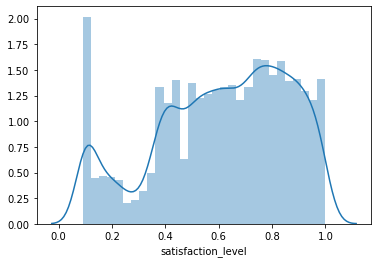

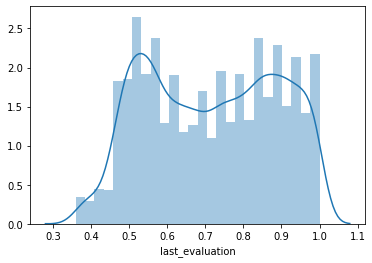

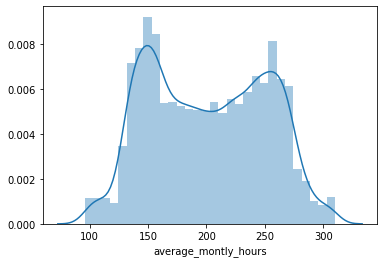

In [30]:
for i in data_numeric:
    if data_numeric[i].nunique() > 10:
        sns.distplot(data_numeric[i])
        plt.show()

# Q8.

Use cross tabulations to count the number of observations per salary category and department.

In [31]:
pd.crosstab(index=data.salary, columns=data.department)

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


# Q9.

Use pivot tables to calculate average satisfaction level per salary category.

In [32]:
pd.pivot_table(data=data, index="salary", values="satisfaction_level", aggfunc="mean")

,satisfaction_level
salary,
high,0.637470
low,0.600753
medium,0.621817


# Q10.

Calculate the percentage of people who churned (Churn = 1) and who did not churn. Plot a pie chart based on that information.

In [33]:
data.churn.value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [34]:
data.churn.value_counts()/data.shape[0]*100 

0    76.191746
1    23.808254
Name: churn, dtype: float64

In [ ]:
# plt.pie(perc_churn, labels=["did_not_churn", "churned"], autopct='%1.1f%%')
plt.show()